In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
df = pd.read_csv('House_pricing.csv',index_col = False)

In [3]:
df.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [4]:
df.shape

(21613, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House

In [6]:
df.describe(include = 'all')

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.161300e+04,21613,2.160900e+04,21613.000000,21609.000000,21604.000000,2.160400e+04,21613.000000,21613,2124,...,21613.000000,21610.000000,21613.000000,21613.000000,21613.000000,21612.000000,21612.000000,21612.000000,21612.000000,21613.000000
unique,NaN,13,NaN,NaN,NaN,NaN,NaN,NaN,2,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,15 April 2016,NaN,NaN,NaN,NaN,NaN,NaN,No,Twice,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2231,NaN,NaN,NaN,NaN,NaN,NaN,21450,963,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.401984e+05,3.370842,2.114732,2079.931772,1.510776e+04,1.494309,NaN,NaN,...,7.623467,1788.344193,291.509045,46.994864,84.402258,98077.937766,47.560048,-122.213892,1986.538914,12768.455652
std,2.876566e+09,NaN,3.673890e+05,0.930062,0.770138,918.487597,4.142827e+04,0.539989,NaN,NaN,...,1.105439,827.982604,442.575043,29.373411,401.679240,53.505425,0.138565,0.140830,685.404255,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,NaN,NaN,...,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,NaN,NaN,...,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,NaN,NaN,...,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,NaN,NaN,...,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


## Removing Duplicate Values

In [7]:
duplicated_rows = df.duplicated()
print(duplicated_rows.sum())
df.drop_duplicates(inplace = True)

0


In [8]:
df.shape

(21613, 21)

No duplicate values found.

## Handling missing values

In [9]:
df.isna().sum()

ID                                               0
Date House was Sold                              0
Sale Price                                       4
No of Bedrooms                                   0
No of Bathrooms                                  4
Flat Area (in Sqft)                              9
Lot Area (in Sqft)                               9
No of Floors                                     0
Waterfront View                                  0
No of Times Visited                          19489
Condition of the House                           0
Overall Grade                                    0
Area of the House from Basement (in Sqft)        3
Basement Area (in Sqft)                          0
Age of House (in Years)                          0
Renovated Year                                   0
Zipcode                                          1
Latitude                                         1
Longitude                                        1
Living Area after Renovation (i

<Axes: >

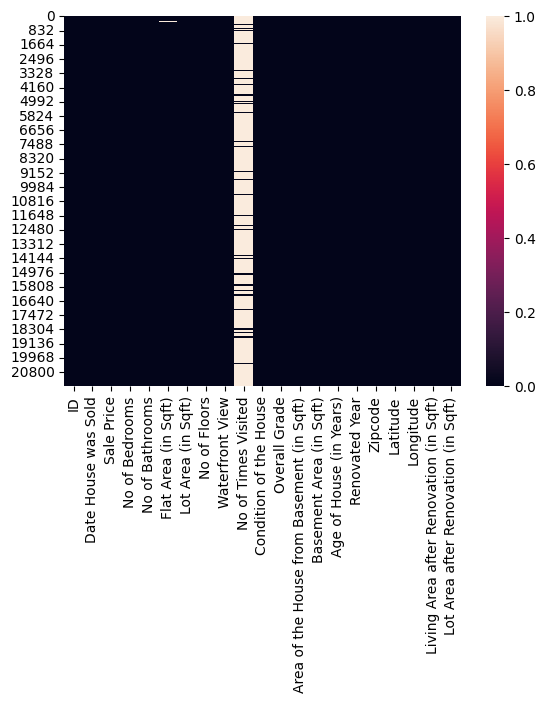

In [10]:
sns.heatmap(df.isna())

In [11]:
#dropping column 'No of Times Visited' because of large number of null values
df.rename(columns = {"No of Times Visited":"visited"},inplace = True)
df.drop(columns = ["visited"],inplace = True)
df.columns

Index(['ID', 'Date House was Sold', 'Sale Price', 'No of Bedrooms',
       'No of Bathrooms', 'Flat Area (in Sqft)', 'Lot Area (in Sqft)',
       'No of Floors', 'Waterfront View', 'Condition of the House',
       'Overall Grade', 'Area of the House from Basement (in Sqft)',
       'Basement Area (in Sqft)', 'Age of House (in Years)', 'Renovated Year',
       'Zipcode', 'Latitude', 'Longitude',
       'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)'],
      dtype='object')

<Axes: >

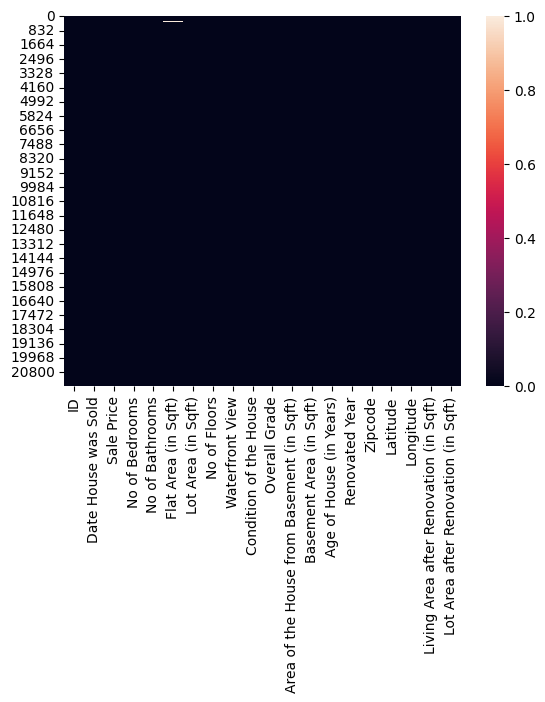

In [12]:
sns.heatmap(df.isna())

In [13]:
#dropping  rows having 
#Zipcode                                          1
#Latitude                                         1
#Longitude                                        1
df.dropna(subset=['Zipcode', 'Latitude','Longitude'],axis = 0, inplace=True)

In [14]:
#filling living area after renovation with average value
livingarea_mean = df['Living Area after Renovation (in Sqft)'].mean()
df.loc[:, 'Living Area after Renovation (in Sqft)'] = df['Living Area after Renovation (in Sqft)'].replace(np.nan, livingarea_mean)

In [15]:
df.isna().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   4
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      0
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       0
Lot Area after Renovation (in Sqft)          0
dtype: int64

In [16]:
# Replace missing values in flat area and lot area with the mean of the group (based on 'No of Bedrooms')
df['Flat Area (in Sqft)'] = df.groupby('No of Bedrooms')['Flat Area (in Sqft)'].transform(lambda x: x.fillna(x.mean()))
df['Lot Area (in Sqft)'] = df.groupby('No of Bedrooms')['Lot Area (in Sqft)'].transform(lambda x: x.fillna(x.mean()))

In [17]:
# Replace missing values in no of bathrooms with the mean of the  (based on 'No of Bedrooms')
df['No of Bathrooms'] = df.groupby('No of Bedrooms')['No of Bathrooms'].transform(lambda x: x.fillna(x.mean()))

In [18]:
df.isna().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   4
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Waterfront View                              0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      0
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       0
Lot Area after Renovation (in Sqft)          0
dtype: int64

In [19]:
#filling sale_price with average value
saleprice_mean = df['Sale Price'].mean()
df.loc[:, 'Sale Price'] = df['Sale Price'].replace(np.nan, saleprice_mean)
#filling Area of the House from Basement (in Sqft) with average value
Areabasement_mean = df['Area of the House from Basement (in Sqft)'].mean()
df.loc[:, 'Area of the House from Basement (in Sqft)'] = df['Area of the House from Basement (in Sqft)'].replace(np.nan, livingarea_mean)

In [20]:
df.isna().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Waterfront View                              0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      0
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       0
Lot Area after Renovation (in Sqft)          0
dtype: int64

In [21]:
# checking of there are unwanted values in categorical columns
df[['Waterfront View']].value_counts()

Waterfront View
No                 21447
Yes                  163
Name: count, dtype: int64

In [22]:
df[['Condition of the House']].value_counts()

Condition of the House
Fair                      14029
Good                       5678
Excellent                  1701
Okay                        172
Bad                          30
Name: count, dtype: int64

In [23]:
#dropping id column cuz it in not useful while building models
df.drop(columns = ['ID'],inplace = True)

In [24]:
#changing Date House was Sold column to datetime format from string format
df['Date House was Sold'] = pd.to_datetime(df['Date House was Sold'], format = 'mixed')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21610 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Date House was Sold                        21610 non-null  datetime64[ns]
 1   Sale Price                                 21610 non-null  float64       
 2   No of Bedrooms                             21610 non-null  int64         
 3   No of Bathrooms                            21610 non-null  float64       
 4   Flat Area (in Sqft)                        21610 non-null  float64       
 5   Lot Area (in Sqft)                         21610 non-null  float64       
 6   No of Floors                               21610 non-null  float64       
 7   Waterfront View                            21610 non-null  object        
 8   Condition of the House                     21610 non-null  object        
 9   Overall Grade         

In [26]:
df.shape

(21610, 19)

In [27]:
df.columns

Index(['Date House was Sold', 'Sale Price', 'No of Bedrooms',
       'No of Bathrooms', 'Flat Area (in Sqft)', 'Lot Area (in Sqft)',
       'No of Floors', 'Waterfront View', 'Condition of the House',
       'Overall Grade', 'Area of the House from Basement (in Sqft)',
       'Basement Area (in Sqft)', 'Age of House (in Years)', 'Renovated Year',
       'Zipcode', 'Latitude', 'Longitude',
       'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)'],
      dtype='object')

## Scaling Numerical Values
Identify all numerical columns (excluding the target variable SalePrice).

In [28]:
#splitting in 
num_df = df.select_dtypes(include = 'number')
cat_df = df.select_dtypes(include = 'object_')
num_df.drop(columns= ['Sale Price'],inplace = True)

In [29]:
print(num_df.columns)
print("___________________________")
print("___________________________")
print(cat_df.columns)

Index(['No of Bedrooms', 'No of Bathrooms', 'Flat Area (in Sqft)',
       'Lot Area (in Sqft)', 'No of Floors', 'Overall Grade',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
       'Age of House (in Years)', 'Renovated Year', 'Zipcode', 'Latitude',
       'Longitude', 'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)'],
      dtype='object')
___________________________
___________________________
Index(['Waterfront View', 'Condition of the House'], dtype='object')


In [30]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(num_df)
num_df_scaled = pd.DataFrame(scaled_data, columns=num_df.columns)
print("\nScaled DataFrame:")
print(num_df_scaled.head())


Scaled DataFrame:
   No of Bedrooms  No of Bathrooms  Flat Area (in Sqft)  Lot Area (in Sqft)  \
0        0.090909          0.12500             0.067170            0.003108   
1        0.090909          0.28125             0.172075            0.004072   
2        0.060606          0.12500             0.036226            0.005743   
3        0.121212          0.37500             0.126038            0.002714   
4        0.090909          0.25000             0.104906            0.004579   

   No of Floors  Overall Grade  Area of the House from Basement (in Sqft)  \
0           0.0       0.666667                                   0.097588   
1           0.4       0.666667                                   0.206140   
2           0.0       0.555556                                   0.052632   
3           0.0       0.666667                                   0.083333   
4           0.0       0.777778                                   0.152412   

   Basement Area (in Sqft)  Age of House (i

In [31]:
num_df_scaled.shape

(21610, 15)

## Encoding categorical variables

In [32]:
#Nominal values
#1.Waterfront View
# Initialize OneHotEncoder
encoder1 = OneHotEncoder(handle_unknown = 'ignore',sparse_output = False)
encoded_data1 = encoder1.fit_transform(cat_df[['Waterfront View']])
encoded_df1 = pd.DataFrame(encoded_data1, columns=encoder1.get_feature_names_out(['Waterfront View']))
encoded_df1.index = cat_df.index
cat_df = pd.concat([cat_df, encoded_df1], axis=1)

In [33]:
#Ordinal values
#2. Condition of the House 
# Initialize Label Encoder
encoder2 = LabelEncoder()
encoded_data2 = encoder2.fit_transform(cat_df['Condition of the House'])
encoded_df2 = pd.DataFrame(encoded_data2,columns = ['Encoded_Condition'])
encoded_df2.index = cat_df.index
cat_df = pd.concat([cat_df, encoded_df2], axis=1)

In [34]:
print(cat_df.shape)
cat_df.isna().sum()

(21610, 5)


Waterfront View           0
Condition of the House    0
Waterfront View_No        0
Waterfront View_Yes       0
Encoded_Condition         0
dtype: int64

In [35]:
cat_df.columns

Index(['Waterfront View', 'Condition of the House', 'Waterfront View_No',
       'Waterfront View_Yes', 'Encoded_Condition'],
      dtype='object')

In [36]:
#dropping the categorical columns
cat_df_encoded = cat_df[['Waterfront View_No','Waterfront View_Yes', 'Encoded_Condition']]
print(cat_df_encoded.head())
print(cat_df_encoded.shape)

   Waterfront View_No  Waterfront View_Yes  Encoded_Condition
0                 1.0                  0.0                  2
1                 1.0                  0.0                  2
2                 1.0                  0.0                  2
3                 1.0                  0.0                  1
4                 1.0                  0.0                  2
(21610, 3)


## Outlier Removal

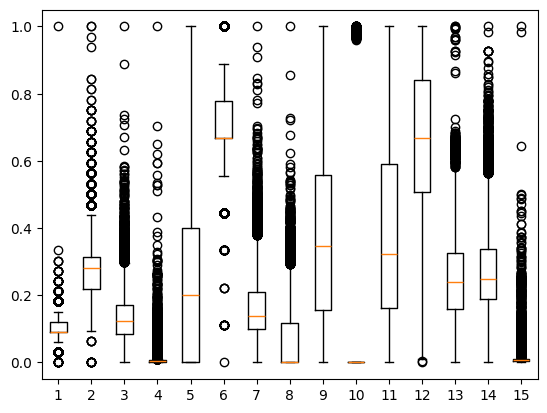

In [37]:
plt.boxplot(num_df_scaled)
plt.show()

In [38]:
def remove_outliers(df,column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3-q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    df[column_name] = df[column_name].clip(upper = upper_bound)
    df[column_name] = df[column_name].clip(lower = lower_bound)
    return df[column_name]

In [39]:
num_cols = num_df_scaled.columns.tolist()
for col in num_cols:
    num_df_scaled[col] = remove_outliers(num_df_scaled,col)

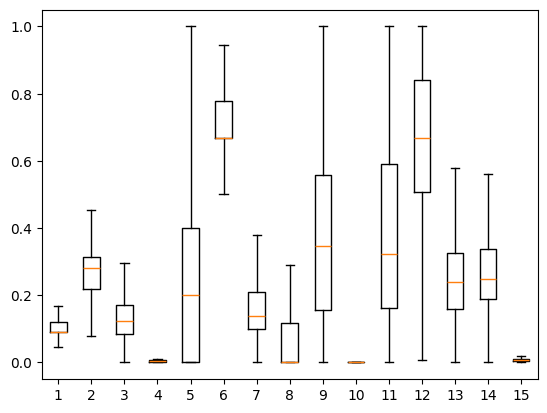

In [40]:
plt.boxplot(num_df_scaled)
plt.show()

In [41]:
#combining the scaled and encoded dataframes into one
num_df_scaled.index = cat_df_encoded.index
df_enc_sc = pd.concat([num_df_scaled,cat_df_encoded,df['Sale Price']],axis = 1)

In [42]:
df_enc_sc.shape

(21610, 19)

In [43]:
df_enc_sc.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Waterfront View_No,Waterfront View_Yes,Encoded_Condition,Sale Price
0,0.090909,0.12500,0.067170,0.003108,0.0,0.666667,0.097588,0.000000,0.521739,0.0,0.893939,0.571498,0.217608,0.161934,0.005742,1.0,0.0,2,221900.0
1,0.090909,0.28125,0.172075,0.004072,0.4,0.666667,0.206140,0.082988,0.556522,0.0,0.626263,0.908959,0.166113,0.222165,0.008027,1.0,0.0,2,538000.0
2,0.060606,0.12500,0.036226,0.005743,0.0,0.555556,0.052632,0.000000,0.713043,0.0,0.136364,0.936143,0.237542,0.399415,0.008513,1.0,0.0,2,180000.0
3,0.121212,0.37500,0.126038,0.002714,0.0,0.666667,0.083333,0.188797,0.434783,0.0,0.681818,0.586939,0.104651,0.165376,0.004996,1.0,0.0,1,604000.0
4,0.090909,0.25000,0.104906,0.004579,0.0,0.777778,0.152412,0.000000,0.243478,0.0,0.368687,0.741354,0.393688,0.241094,0.007871,1.0,0.0,2,510000.0


## Train_Test Split

In [44]:
X = df_enc_sc.drop(columns = ['Sale Price'])
y = df_enc_sc['Sale Price']

In [45]:
#Split the dataset into training (80%) and testing (20%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [46]:
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)

Training Features Shape: (17288, 18)
Testing Features Shape: (4322, 18)
Training Target Shape: (17288,)
Testing Target Shape: (4322,)
